In [1]:
!ln -s '/content/drive/My Drive' /gdrive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from datetime import datetime
from datetime import timedelta
from scipy.io import loadmat
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

#Loading Matlab data


In [2]:
imdb = loadmat('/gdrive/imdb.mat')
wiki = loadmat('/gdrive/wiki.mat')

#Creating age variable


In [3]:
imdb_born = [datetime.fromordinal(int(matlab_datenum)).year-1 for matlab_datenum in list(imdb['imdb'][0][0]['dob'][0])]
wiki_born = [datetime.fromordinal(int(matlab_datenum)).year-1 for matlab_datenum in list(wiki['wiki'][0][0]['dob'][0])]
dataset = ['imdb']*len(imdb_born)+['wiki']*len(wiki_born)
born = imdb_born + wiki_born
taken = np.hstack((imdb['imdb'][0][0]['photo_taken'][0],wiki['wiki'][0][0]['photo_taken'][0]))
age = taken - np.array(born) 
sex = np.hstack((imdb['imdb'][0][0]['gender'][0],wiki['wiki'][0][0]['gender'][0]))

#Creating dataframe with age, gender and dataset information


In [4]:
agesex = pd.DataFrame([dataset,age,sex],index=['from','age','sex'],dtype=np.int8).T
agesex = agesex[(0<agesex.age)&(agesex.age<100)].reset_index(drop=True)
agesex['age'] = agesex['age'].apply(pd.to_numeric)
agesex['sex'] = agesex['sex'].apply(pd.to_numeric)

#Summary statistics


In [5]:
display_side_by_side(round(agesex[agesex['from']=='imdb'].describe(),1),round(agesex[agesex['from']=='wiki'].describe(),1),round(agesex.describe(),1))

,age,sex
count,460019.0,451566.0
mean,36.9,0.6
std,13.1,0.5
min,1.0,0.0
25%,28.0,0.0
50%,35.0,1.0
75%,44.0,1.0
max,99.0,1.0
,age,sex
count,60408.0,57932.0


#Visualization of the age distribution


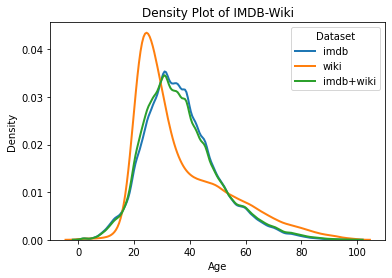

In [6]:
data = ['imdb','wiki']
for d in data:
    subset = agesex[agesex['from'] == d]
    sns.distplot(subset['age'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = d)
sns.distplot(agesex['age'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = 'imdb+wiki')
plt.legend(title = 'Dataset')
plt.title('Density Plot of IMDB-Wiki')
plt.xlabel('Age')
plt.ylabel('Density')
plt.savefig('caai1.png')
plt.show()

#Answers to question 2 and 3


In [7]:
print(len(agesex[(15<=agesex.age)&(agesex.age<=25)]))
print(len(agesex))
print(len(agesex[(15<=agesex.age)&(agesex.age<=25)])/len(agesex))

90939
520427
0.17473920453781222


In [8]:
print(len(agesex[(agesex.age==30)&(agesex.sex==1)]))
print(len(agesex[(agesex.age==30)&(agesex.sex==1)])/len(agesex))

8555
0.01643842460133698
